In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt 
%matplotlib inline 

#Lê as entradas
f = open("dados_autent_bancaria.txt")
data = np.loadtxt(f, delimiter=',')

#Separa os dados para treino e teste
# 80% de cada classe para treino e 20% para teste
def split_data(data):
    class_a = []
    class_b = []
    for d in data:
        if(d[-1] == 0):
            class_a.append(d)
        else:
            class_b.append(d)
    
    num_class_a = len(class_a)
    num_class_b = len(class_b)
    
    # 80% de cada classe para treino
    split_point_a = round(num_class_a * 0.8) 
    split_point_b = round(num_class_b * 0.8)
    
    return np.array(class_a[:split_point_a]), np.array(class_a[split_point_a:]), np.array(class_b[:split_point_b]), np.array(class_b[split_point_b:])
    
train_a, test_a, train_b, test_b = split_data(data)

/home/minoro/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


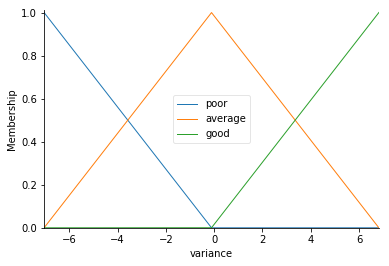

In [3]:

variance = ctrl.Antecedent(sorted(data[:, 0]), 'variance')
skewness = ctrl.Antecedent(sorted(data[:, 1]), 'skewness')
curtosis = ctrl.Antecedent(sorted(data[:, 2]), 'curtosis')
entropy = ctrl.Antecedent(sorted(data[:, 3]), 'entropy')


variance.automf(3)
skewness.automf(3)
curtosis.automf(3)
entropy.automf(3)


variance.view()
# skewness.view()
# curtosis.view()
# entropy.view()

-7.0421
6.8248
6.93345
[1.         0.98557717 0.97115433 0.9567315  0.94230866 0.92788583
 0.91346299 0.89904016 0.88461733 0.87019449 0.85577166 0.84134882
 0.82692599 0.81250315 0.79808032 0.78365749 0.76923465 0.75481182
 0.74038898 0.72596615 0.71154332 0.69712048 0.68269765 0.66827481
 0.65385198 0.63942914 0.62500631 0.61058348 0.59616064 0.58173781
 0.56731497 0.55289214 0.5384693  0.52404647 0.50962364 0.4952008
 0.48077797 0.46635513 0.4519323  0.43750946 0.42308663 0.4086638
 0.39424096 0.37981813 0.36539529 0.35097246 0.33654963 0.32212679
 0.30770396 0.29328112 0.27885829 0.26443545 0.25001262 0.23558979
 0.22116695 0.20674412 0.19232128 0.17789845 0.16347561 0.14905278
 0.13462995 0.12020711 0.10578428 0.09136144 0.07693861 0.06251577
 0.04809294 0.03367011 0.01924727 0.00482444 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.   

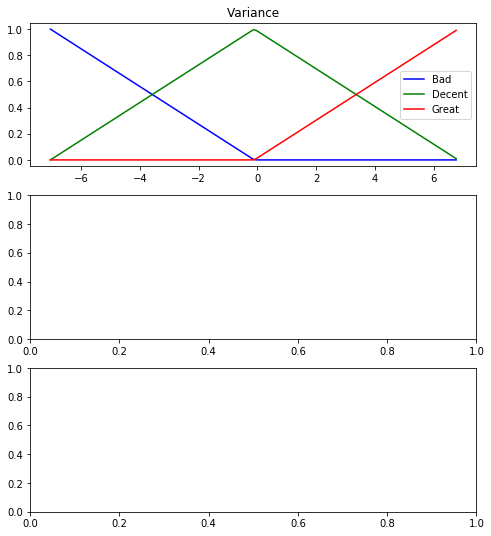

In [90]:



variance_data = sorted(data[:, 0])
min_v = variance_data[0]
max_v = variance_data[-1]

step = (max_v - min_v) / 2


print(min_v)
print(max_v)
print(step)

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(min_v, max_v, 0.1)
# x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [min_v, min_v, (min_v + step)])
qual_md = fuzz.trimf(x_qual, [min_v, (min_v + step), max_v])
qual_hi = fuzz.trimf(x_qual, [(min_v + step), max_v, max_v])
# serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
# serv_md = fuzz.trimf(x_serv, [0, 5, 10])
# serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

print(qual_lo)

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))




# Turn off top/right axes
# ax0.spines['top'].set_visible(False)
# ax0.spines['right'].set_visible(False)
# ax0.get_xaxis().tick_bottom()
# ax0.get_yaxis().tick_left()
    
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Variance')
ax0.legend()


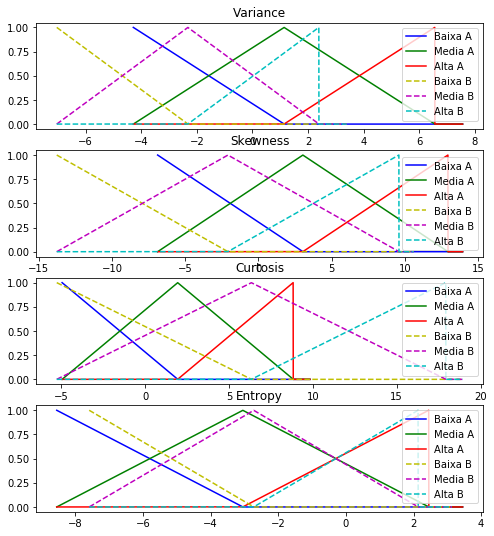

In [69]:
# print(train_a[:, 0])
def get_min_max_step(data):
    min_v = data[0]
    max_v = data[-1]

    step = (max_v - min_v) / 2
    
    return min_v, max_v, step

def build_trimf(data):
    min_v, max_v, step = get_min_max_step(data)
    x_data = np.arange(min_v, max_v + 1.001, 0.001)
    
    data_lo = fuzz.trimf(x_data, [min_v, min_v, (min_v + step)])
    data_md = fuzz.trimf(x_data, [min_v, (min_v + step), max_v])
    data_hi = fuzz.trimf(x_data, [(min_v + step), max_v, max_v])
    
    return data_lo, data_md, data_hi, x_data
    
variance_data_a = sorted(train_a[:, 0])
variance_data_b = sorted(train_b[:, 0])

skewness_data_a = sorted(train_a[:, 1])
skewness_data_b = sorted(train_b[:, 1])

curtosis_data_a = sorted(train_a[:, 2])
curtosis_data_b = sorted(train_b[:, 2])

entropy_data_a = sorted(train_a[:, 3])
entropy_data_b = sorted(train_b[:, 3])

variance_a_lo, variance_a_md, variance_a_hi, x_variance_data_a = build_trimf(variance_data_a)
variance_b_lo, variance_b_md, variance_b_hi, x_variance_data_b = build_trimf(variance_data_b)

skewness_a_lo, skewness_a_md, skewness_a_hi, x_skewness_data_a = build_trimf(skewness_data_a)
skewness_b_lo, skewness_b_md, skewness_b_hi, x_skewness_data_b = build_trimf(skewness_data_b)

curtosis_a_lo, curtosis_a_md, curtosis_a_hi, x_curtosis_data_a = build_trimf(curtosis_data_a)
curtosis_b_lo, curtosis_b_md, curtosis_b_hi, x_curtosis_data_b = build_trimf(curtosis_data_b)

entropy_a_lo, entropy_a_md, entropy_a_hi, x_entropy_data_a = build_trimf(entropy_data_a)
entropy_b_lo, entropy_b_md, entropy_b_hi, x_entropy_data_b = build_trimf(entropy_data_b)

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))


ax0.plot(x_variance_data_a, variance_a_lo, 'b', linewidth=1.5, label='Baixa A')
ax0.plot(x_variance_data_a, variance_a_md, 'g', linewidth=1.5, label='Media A')
ax0.plot(x_variance_data_a, variance_a_hi, 'r', linewidth=1.5, label='Alta A')

ax0.plot(x_variance_data_b, variance_b_lo, 'y--', linewidth=1.5, label='Baixa B')
ax0.plot(x_variance_data_b, variance_b_md, 'm--', linewidth=1.5, label='Media B')
ax0.plot(x_variance_data_b, variance_b_hi, 'c--', linewidth=1.5, label='Alta B')
ax0.set_title('Variance')
ax0.legend()



ax1.plot(x_skewness_data_a, skewness_a_lo, 'b', linewidth=1.5, label='Baixa A')
ax1.plot(x_skewness_data_a, skewness_a_md, 'g', linewidth=1.5, label='Media A')
ax1.plot(x_skewness_data_a, skewness_a_hi, 'r', linewidth=1.5, label='Alta A')

ax1.plot(x_skewness_data_b, skewness_b_lo, 'y--', linewidth=1.5, label='Baixa B')
ax1.plot(x_skewness_data_b, skewness_b_md, 'm--', linewidth=1.5, label='Media B')
ax1.plot(x_skewness_data_b, skewness_b_hi, 'c--', linewidth=1.5, label='Alta B')
ax1.set_title('Skewness')
ax1.legend()

ax2.plot(x_curtosis_data_a, curtosis_a_lo, 'b', linewidth=1.5, label='Baixa A')
ax2.plot(x_curtosis_data_a, curtosis_a_md, 'g', linewidth=1.5, label='Media A')
ax2.plot(x_curtosis_data_a, curtosis_a_hi, 'r', linewidth=1.5, label='Alta A')

ax2.plot(x_curtosis_data_b, curtosis_b_lo, 'y--', linewidth=1.5, label='Baixa B')
ax2.plot(x_curtosis_data_b, curtosis_b_md, 'm--', linewidth=1.5, label='Media B')
ax2.plot(x_curtosis_data_b, curtosis_b_hi, 'c--', linewidth=1.5, label='Alta B')
ax2.set_title('Curtosis')
ax2.legend()

ax3.plot(x_entropy_data_a, entropy_a_lo, 'b', linewidth=1.5, label='Baixa A')
ax3.plot(x_entropy_data_a, entropy_a_md, 'g', linewidth=1.5, label='Media A')
ax3.plot(x_entropy_data_a, entropy_a_hi, 'r', linewidth=1.5, label='Alta A')

ax3.plot(x_entropy_data_b, entropy_b_lo, 'y--', linewidth=1.5, label='Baixa B')
ax3.plot(x_entropy_data_b, entropy_b_md, 'm--', linewidth=1.5, label='Media B')
ax3.plot(x_entropy_data_b, entropy_b_hi, 'c--', linewidth=1.5, label='Alta B')
ax3.set_title('Entropy')
ax3.legend()


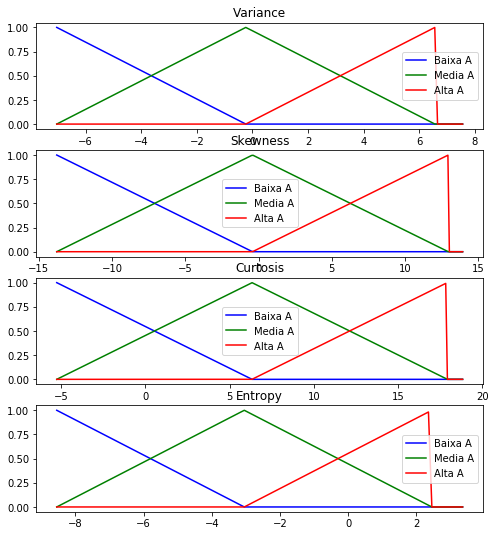

In [70]:
# print(train_a[:, 0])
def get_min_max_step(data):
    min_v = data[0]
    max_v = data[-1]

    step = (max_v - min_v) / 2
    
    return min_v, max_v, step

def build_trimf(data):
    min_v, max_v, step = get_min_max_step(data)
    x_data = np.arange(min_v, max_v + 1, 0.1)
    
    data_lo = fuzz.trimf(x_data, [min_v, min_v, (min_v + step)])
    data_md = fuzz.trimf(x_data, [min_v, (min_v + step), max_v])
    data_hi = fuzz.trimf(x_data, [(min_v + step), max_v, max_v])
    
    return data_lo, data_md, data_hi, x_data
        
variance_data = sorted(np.hstack((train_a[:, 0], train_b[:, 0])))
skewness_data = sorted(np.hstack((train_a[:, 1], train_b[:, 1])))
curtosis_data = sorted(np.hstack((train_a[:, 2], train_b[:, 2])))
entropy_data = sorted(np.hstack((train_a[:, 3], train_b[:, 3])))

variance_lo, variance_md, variance_hi, x_variance_data = build_trimf(variance_data)
skewness_lo, skewness_md, skewness_hi, x_skewness_data = build_trimf(skewness_data)
curtosis_lo, curtosis_md, curtosis_hi, x_curtosis_data = build_trimf(curtosis_data)
entropy_lo, entropy_md, entropy_hi, x_entropy_data = build_trimf(entropy_data)

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))


ax0.plot(x_variance_data, variance_lo, 'b', linewidth=1.5, label='Baixa A')
ax0.plot(x_variance_data, variance_md, 'g', linewidth=1.5, label='Media A')
ax0.plot(x_variance_data, variance_hi, 'r', linewidth=1.5, label='Alta A')
ax0.set_title('Variance')
ax0.legend()

ax1.plot(x_skewness_data, skewness_lo, 'b', linewidth=1.5, label='Baixa A')
ax1.plot(x_skewness_data, skewness_md, 'g', linewidth=1.5, label='Media A')
ax1.plot(x_skewness_data, skewness_hi, 'r', linewidth=1.5, label='Alta A')
ax1.set_title('Skewness')
ax1.legend()

ax2.plot(x_curtosis_data, curtosis_lo, 'b', linewidth=1.5, label='Baixa A')
ax2.plot(x_curtosis_data, curtosis_md, 'g', linewidth=1.5, label='Media A')
ax2.plot(x_curtosis_data, curtosis_hi, 'r', linewidth=1.5, label='Alta A')
ax2.set_title('Curtosis')
ax2.legend()

ax3.plot(x_entropy_data, entropy_lo, 'b', linewidth=1.5, label='Baixa A')
ax3.plot(x_entropy_data, entropy_md, 'g', linewidth=1.5, label='Media A')
ax3.plot(x_entropy_data, entropy_hi, 'r', linewidth=1.5, label='Alta A')
ax3.set_title('Entropy')
ax3.legend()


In [78]:

train_data = np.vstack((train_a[:], train_b[:]))

def get_activated(lo, md, hi):
    activated = np.fmin(np.fmin(lo, md), hi)
    
    if activated == lo:
        return activated, 'low'
    if activated == md:
        return activated, 'medium'
    if activated == hi:
        return activated, 'high'
        
i = 0
for v, s, c, e, cls in train_data:
    
    var_level_lo = fuzz.interp_membership(x_variance_data, variance_lo, v)
    var_level_md = fuzz.interp_membership(x_variance_data, variance_md, v)
    var_level_hi = fuzz.interp_membership(x_variance_data, variance_hi, v)
    
    ske_level_lo = fuzz.interp_membership(x_skewness_data, skewness_lo, s)
    ske_level_md = fuzz.interp_membership(x_skewness_data, skewness_md, s)
    ske_level_hi = fuzz.interp_membership(x_skewness_data, skewness_hi, s)
    
    cur_level_lo = fuzz.interp_membership(x_curtosis_data, curtosis_lo, c)
    cur_level_md = fuzz.interp_membership(x_curtosis_data, curtosis_md, c)
    cur_level_hi = fuzz.interp_membership(x_curtosis_data, curtosis_hi, c)
    
    ent_level_lo = fuzz.interp_membership(x_entropy_data, entropy_lo, e)
    ent_level_md = fuzz.interp_membership(x_entropy_data, entropy_md, e)
    ent_level_hi = fuzz.interp_membership(x_entropy_data, entropy_hi, e)
        
    var_level, var_activated  = get_activated(var_level_lo, var_level_md, var_level_hi)
    ske_level, ske_activated  = get_activated(ske_level_lo, ske_level_md, ske_level_hi)
    cur_level, cur_activated  = get_activated(cur_level_lo, cur_level_md, cur_level_hi)
    ent_level, ent_activated  = get_activated(ent_level_lo, ent_level_md, ent_level_hi)
    
    if var_level != 0 or ske_level != 0 or cur_level != 0 or ent_level != 0:
        print(var_activated)
        print(var_level)

        print(ske_activated)
        print(ske_level)

        print(cur_activated)
        print(cur_level)

        print(ent_activated)
        print(ent_level)

        print(cls)
   

low
0.0
low
0.0
high
0.0
high
7.821635432734226e-05
0.0
low
0.0002544136886845927
low
0.0
high
0.0
high
0.0
0.0
low
0.0002544136886845927
low
0.0
high
0.0
high
0.0
0.0
low
0.00010021756067523009
low
0.0
high
0.0
high
0.0
0.0
low
0.0
low
0.0
high
0.0
high
0.0001486947270768093
0.0
low
0.0
high
0.00032797075364828415
low
0.0
low
0.0
0.0
low
7.533185352931752e-05
high
0.0
low
0.0
low
0.0
0.0
low
0.0002957311067689547
low
0.0
high
0.0
high
0.0
0.0
low
0.0
high
0.0008526112547570923
high
0.0
low
0.0
0.0
high
0.0
low
0.0
high
0.0
high
0.0001215072242357685
0.0
high
0.0
low
0.0
high
0.0
high
0.0001838293461329246
1.0
high
0.0
low
0.0006467208238054795
high
0.0
low
0.0
1.0
high
0.0
high
0.0
low
0.0
high
2.6978368203841513e-05
1.0
high
0.0
low
0.0
high
0.0
high
9.996635660017453e-05
1.0
low
0.0003630058653213021
low
0.0
high
0.0
low
0.0
1.0
low
0.000285133843917346
high
0.0
high
0.0
low
0.0
1.0
low
0.00012248371970052032
high
0.0
high
0.0
low
0.0
1.0
high
0.0
low
0.0
high
0.0
high
0.00012422597